In [13]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model  import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, roc_auc_score, roc_curve, accuracy_score, f1_score, precision_score, recall_score
import matplotlib.pyplot as plt
from sklearn.svm import SVC

import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv("/Users/elgun/Desktop/Machine_Learning_Project/data/clasification.csv")
data

,ID,Asst_Reg,GGGrade,Experience,Validation,Yearly_Income,Home_Status,Unpaid_2_years,Already_Defaulted,Designation,...,File_Status,State,Account_Open,Total_Unpaid_CL,Duration,Unpaid_Amount,Reason,Claim_Type,Due_Fee,Default
0,95074,421802,II,>10yrs,Vfied,633600.00,MORTGAGE,0,0,GLENDALE NISSAN,...,fully paid,California,17,58598.0,3 years,31216.05,debt consolidation,I,0.0,0
1,134131,3964312,IV,7yrs,Source Verified,85483.20,RENT,0,0,Business Teacher,...,whole,NC,15,18924.0,5 years,11660.49,debt consolidation,I,0.0,0
2,92602,4247560,III,<1yr,Source Verified,79200.00,RENT,0,0,driver,...,whole,Florida,7,15604.0,5 years,5637.87,major purchase,I,0.0,0
3,22591,197179,III,<1yr,Vfied,61600.00,RENT,0,0,AvePoint,...,fully paid,NewJersey,9,22410.0,3 years,15607.17,major purchase,I,0.0,1
4,125060,4646684,V,2yrs,Source Verified,68053.92,RENT,0,0,Lead Tester,...,fully paid,LA,10,36022.0,5 years,27472.86,debt consolidation,I,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87495,120884,4535984,II,>10yrs,Not Vfied,75680.00,RENT,0,0,Engineer Support II,...,whole,MI,12,32702.0,3 years,10012.05,debt consolidation,I,0.0,0
87496,33259,2624710,IV,3yrs,Source Verified,90423.52,RENT,0,0,Dental Hygienist,...,whole,MA,23,32204.0,5 years,24921.54,debt consolidation,I,0.0,0
87497,102153,5966919,II,>10yrs,Source Verified,91520.00,MORTGAGE,0,0,Interface Coordinator,...,fully paid,CT,8,29050.0,3 years,14517.90,debt consolidation,I,0.0,0
87498,115343,2630667,III,1yrs,Source Verified,61600.00,MORTGAGE,0,0,PARTS CLERK,...,whole,PA,11,24900.0,3 years,8454.24,debt consolidation,I,0.0,0


Missing values in each column:
 ID                        0
Asst_Reg                  0
GGGrade                   0
Experience                0
Validation                0
Yearly_Income          5575
Home_Status               0
Unpaid_2_years            0
Already_Defaulted         0
Designation            1414
Debt_to_Income         3489
Postal_Code            1389
Lend_Amount               0
Deprecatory_Records       0
Interest_Charged          0
Usage_Rate                0
Inquiries                 0
Present_Balance           0
Gross_Collection          0
Sub_GGGrade               0
File_Status               0
State                     0
Account_Open              0
Total_Unpaid_CL        4186
Duration                  0
Unpaid_Amount          4852
Reason                    0
Claim_Type                0
Due_Fee                   0
Default                   0
dtype: int64


/var/folders/3l/xjpx70415s7_2dljh8_3q2_80000gn/T/ipykernel_64260/2142064841.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[column].fillna(data[column].mean(), inplace=True)
/var/folders/3l/xjpx70415s7_2dljh8_3q2_80000gn/T/ipykernel_64260/2142064841.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting valu

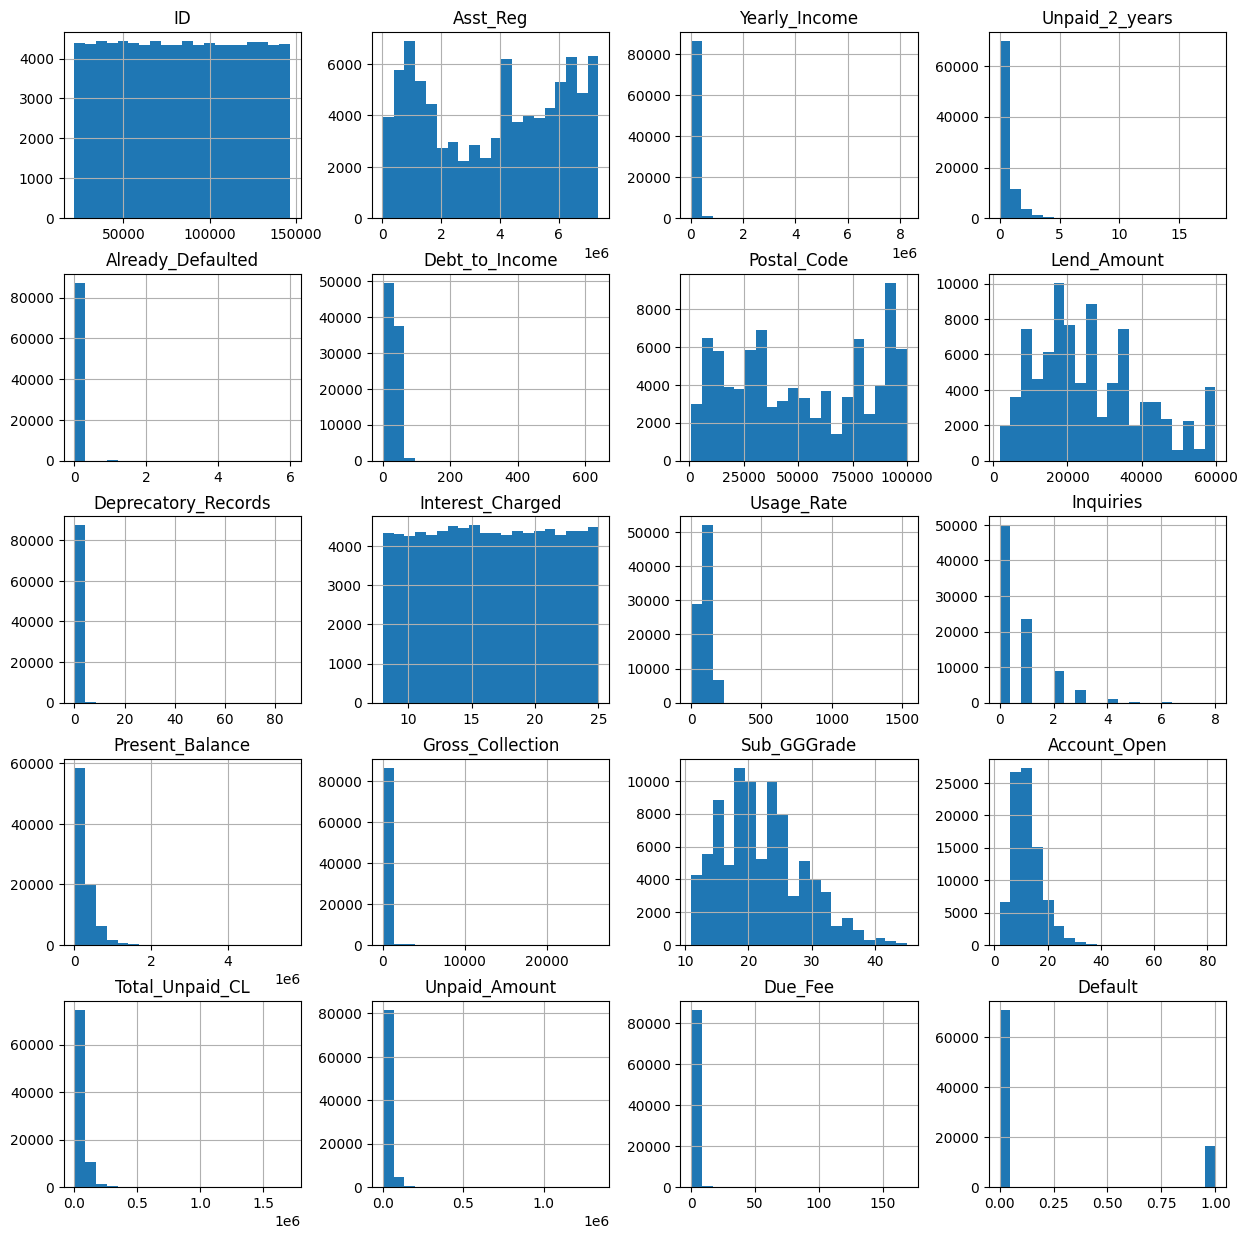

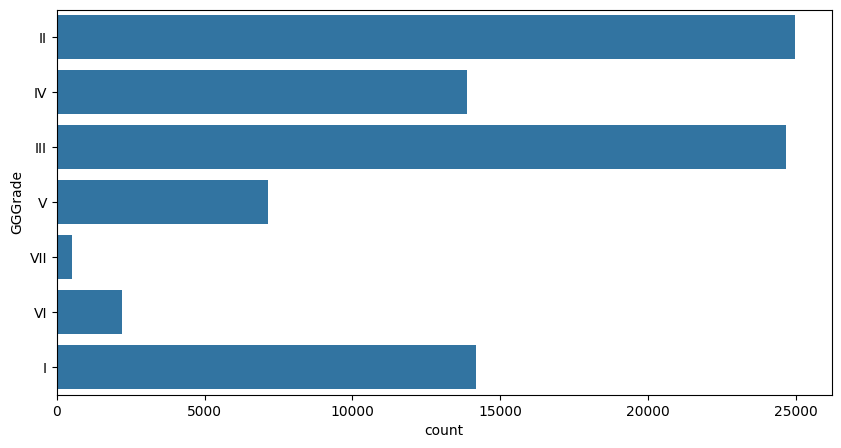

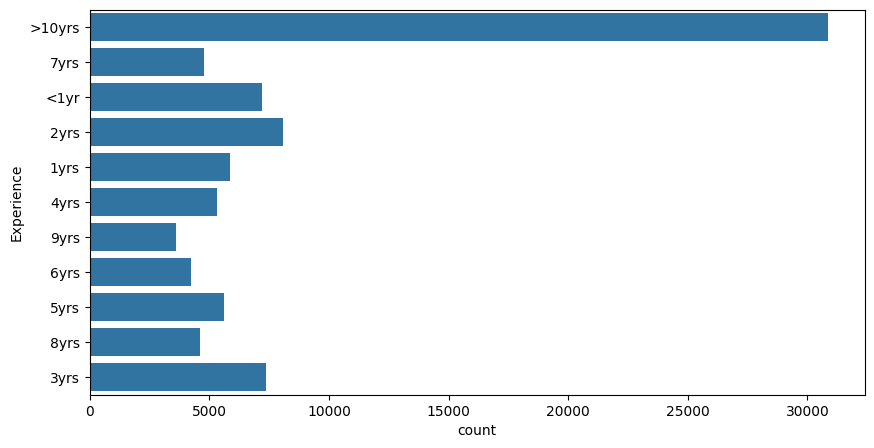

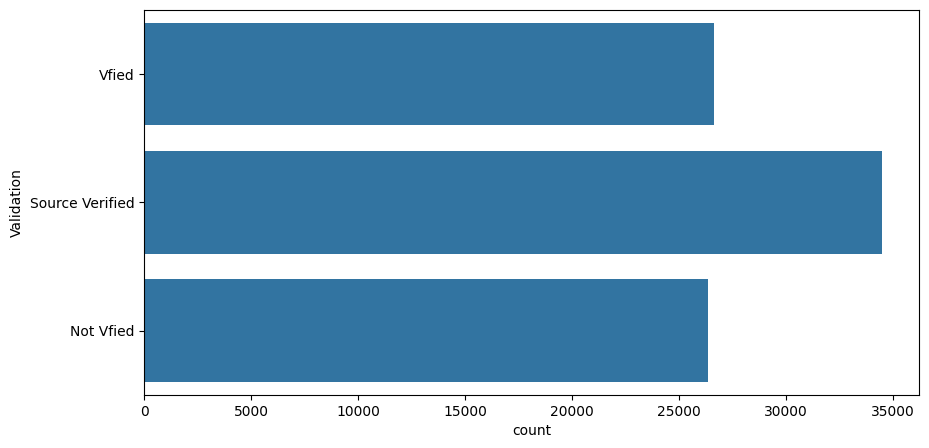

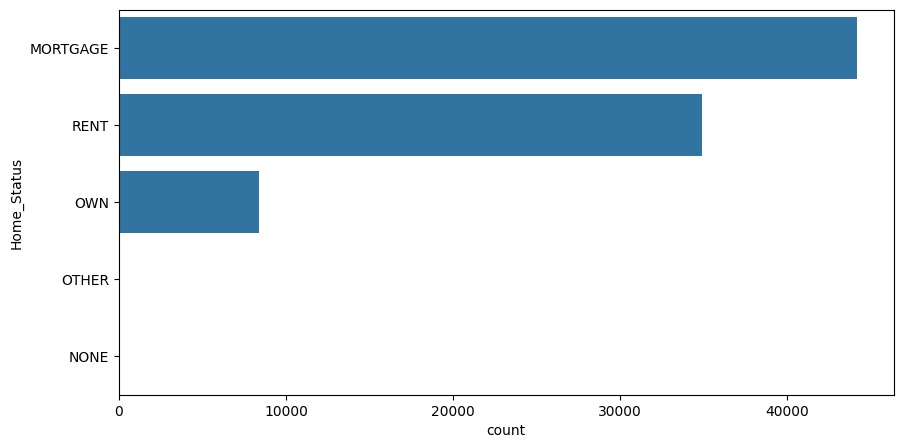

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 129 (\x81) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 131 (\x83) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 146 (\x92) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 130 (\x82) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Gly

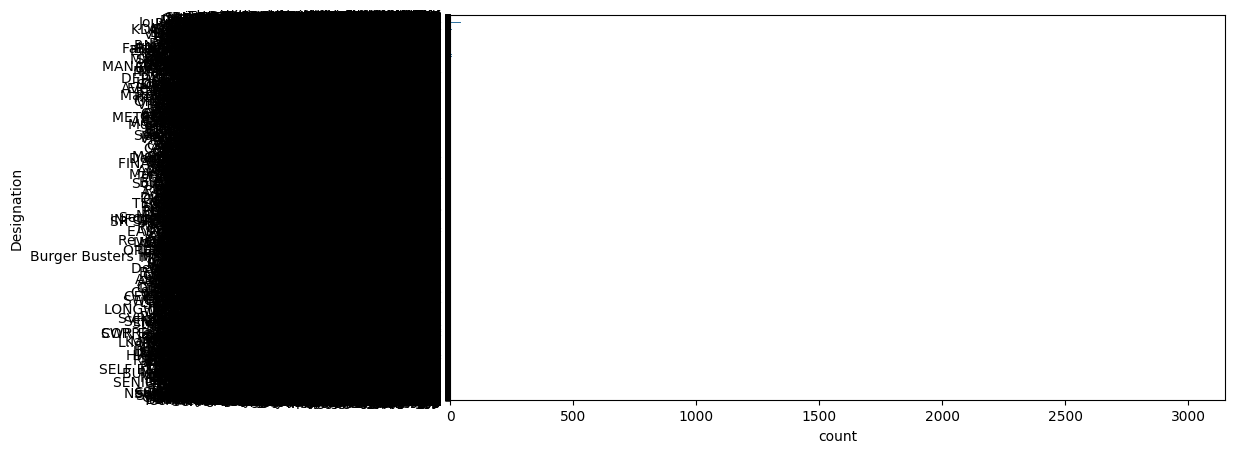

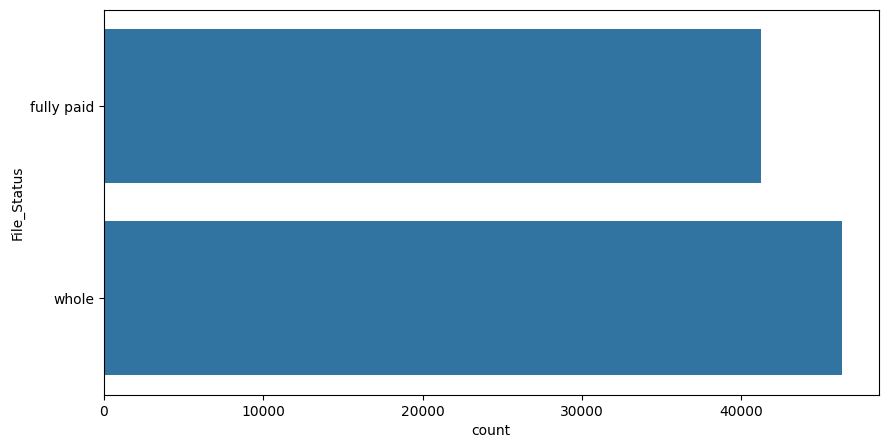

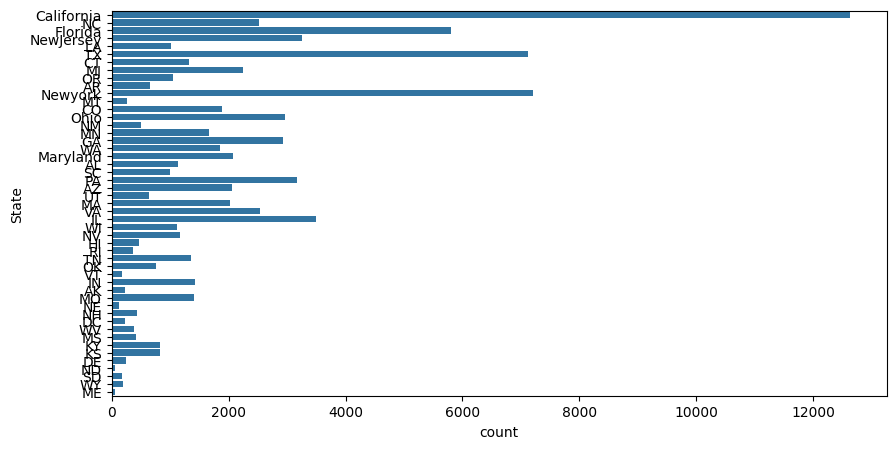

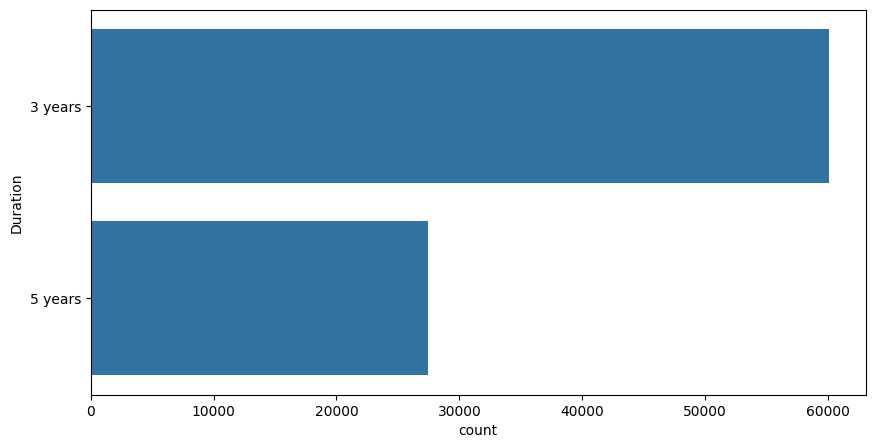

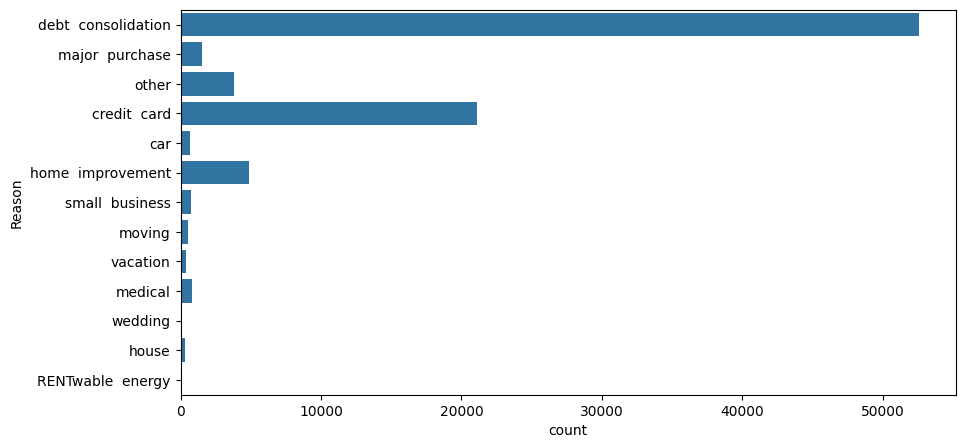

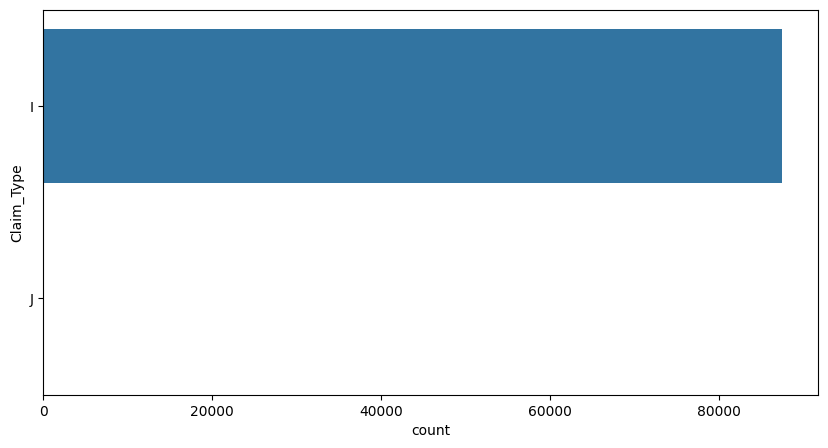

In [4]:


# Check for missing values
missing_values = data.isnull().sum()
print("Missing values in each column:\n", missing_values)

# Handle missing values (for simplicity, we will fill numerical columns with the mean and categorical columns with the mode)
for column in data.columns:
    if data[column].dtype == 'object':
        data[column].fillna(data[column].mode()[0], inplace=True)
    else:
        data[column].fillna(data[column].mean(), inplace=True)

# Analyze the distribution of numerical features
numerical_features = data.select_dtypes(include=['int64', 'float64']).columns
data[numerical_features].hist(figsize=(15, 15), bins=20)
plt.show()

# Analyze the distribution of categorical features
categorical_features = data.select_dtypes(include=['object']).columns
for column in categorical_features:
    plt.figure(figsize=(10, 5))
    sns.countplot(y=column, data=data)
    plt.show()

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
import numpy as np

# Step 1: Handle missing values by imputing with mean for numerical columns and mode for categorical columns
data.fillna({
    'Yearly_Income': data['Yearly_Income'].mean(),
    'Debt_to_Income': data['Debt_to_Income'].mean(),
    'Postal_Code': data['Postal_Code'].mode()[0],
    'Designation': 'Unknown',
    'Total_Unpaid_CL': data['Total_Unpaid_CL'].mean(),
    'Unpaid_Amount': data['Unpaid_Amount'].mean()
}, inplace=True)

# Step 2: Encode categorical variables using LabelEncoder
categorical_columns = [
    'GGGrade', 'Experience', 'Validation', 'Home_Status', 'Designation', 'File_Status',
    'State', 'Duration', 'Reason', 'Claim_Type'
]

label_encoders = {col: LabelEncoder() for col in categorical_columns}

for col in categorical_columns:
    data[col] = label_encoders[col].fit_transform(data[col])

# Step 3: Separate features (X) and target (y)
X = data.drop(columns=['ID', 'Default'])  # 'ID' is dropped as it is not a feature
y = data['Default']

# Step 4: Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Step 5: Feature scaling for SVM (standardization)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train.shape, X_test.shape, y_train.shape, y_test.shape


((70000, 28), (17500, 28), (70000,), (17500,))

In [11]:
# Train Logistic Regression model
logistic_regression = LogisticRegression(random_state=42)
logistic_regression.fit(X_train_scaled, y_train)
logistic_regression_predictions = logistic_regression.predict(X_test_scaled)

# Evaluate Logistic Regression model
logistic_regression_accuracy = accuracy_score(y_test, logistic_regression_predictions)
logistic_regression_roc_auc = roc_auc_score(y_test, logistic_regression_predictions)
logistic_regression_confusion_matrix = confusion_matrix(y_test, logistic_regression_predictions)
logistic_regression_f1_score = f1_score(y_test, logistic_regression_predictions)
logistic_regression_precision = precision_score(y_test, logistic_regression_predictions)
logistic_regression_recall = recall_score(y_test, logistic_regression_predictions)

logistic_regression_accuracy, logistic_regression_roc_auc, logistic_regression_confusion_matrix, logistic_regression_f1_score, logistic_regression_precision, logistic_regression_recall

(0.8327428571428571,
 0.6275539230621626,
 array([[13589,   609],
        [ 2318,   984]]),
 0.4020429009193054,
 0.6177024482109228,
 0.29800121138703817)

In [14]:
# Define a simpler parameter grid for SVM to reduce computation time
svm_param_grid_simple = {
    'C': [0.1, 1],
    'kernel': ['linear'],
    'gamma': ['scale']
}

# GridSearchCV for SVM with simpler parameter grid
svm_grid_search_simple = GridSearchCV(SVC(random_state=42), svm_param_grid_simple, cv=2, scoring='accuracy', verbose=1)
svm_grid_search_simple.fit(X_train_scaled, y_train)

# Best SVM model and evaluation
best_svm_model_simple = svm_grid_search_simple.best_estimator_
svm_tuned_predictions_simple = best_svm_model_simple.predict(X_test_scaled)
svm_tuned_accuracy_simple = accuracy_score(y_test, svm_tuned_predictions_simple)
swm_tuned_auc_simple = roc_auc_score(y_test, svm_tuned_predictions_simple)
swm_tuned_confusion_matrix_simple = confusion_matrix(y_test, svm_tuned_predictions_simple)
swm_tuned_precision_simple = precision_score(y_test, svm_tuned_predictions_simple)
swm_tuned_f1_score_simple = f1_score(y_test, svm_tuned_predictions_simple)
swm_tuned_recall_simple = recall_score(y_test, svm_tuned_predictions_simple)
swm_tuned_auc_simple = roc_auc_score(y_test, svm_tuned_predictions_simple)
swm_tuned_confusion_matrix_simple = confusion_matrix(y_test, svm_tuned_predictions_simple)

svm_grid_search_simple.best_params_, svm_tuned_accuracy_simple, swm_tuned_auc_simple, swm_tuned_confusion_matrix_simple, swm_tuned_precision_simple, swm_tuned_f1_score_simple, swm_tuned_recall_simple

Fitting 2 folds for each of 2 candidates, totalling 4 fits


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


({'C': 0.1, 'gamma': 'scale', 'kernel': 'linear'},
 0.8113142857142858,
 0.5,
 array([[14198,     0],
        [ 3302,     0]]),
 0.0,
 0.0,
 0.0)

In [18]:
# Define a simpler parameter grid for Random Forest to reduce computation time
rf_param_grid_simple = {
    'n_estimators': [10, 50],
    'max_depth': [None, 10],
    'min_samples_split': [2, 5]
}

# GridSearchCV for Random Forest with simpler parameter grid
rf_grid_search_simple = GridSearchCV(RandomForestClassifier(random_state=42), rf_param_grid_simple, cv=2, scoring='accuracy', verbose=1)
rf_grid_search_simple.fit(X_train, y_train)

# Best Random Forest model and evaluation
best_rf_model_simple = rf_grid_search_simple.best_estimator_
rf_tuned_predictions_simple = best_rf_model_simple.predict(X_test)
rf_tuned_accuracy_simple = accuracy_score(y_test, rf_tuned_predictions_simple)
rf_tuned_auc_simple = roc_auc_score(y_test, rf_tuned_predictions_simple)
rf_tuned_confusion_matrix_simple = confusion_matrix(y_test, rf_tuned_predictions_simple)
rf_tuned_f1_simple = f1_score(y_test, rf_tuned_predictions_simple)
rf_tuned_recall_simple = recall_score(y_test, rf_tuned_predictions_simple)
rf_tuned_precision_simple = precision_score(y_test, rf_tuned_predictions_simple)
rf_tuned_auc_simple = roc_auc_score(y_test, rf_tuned_predictions_simple)
rf_tuned_confusion_matrix_simple = confusion_matrix(y_test, rf_tuned_predictions_simple)
rf_grid_search_simple.best_params_, rf_tuned_accuracy_simple, 

Fitting 2 folds for each of 8 candidates, totalling 16 fits


({'max_depth': None, 'min_samples_split': 2, 'n_estimators': 50},
 0.8369142857142857,
 '              precision    recall  f1-score   support\n\n           0       0.85      0.97      0.91     14198\n           1       0.68      0.25      0.37      3302\n\n    accuracy                           0.84     17500\n   macro avg       0.77      0.61      0.64     17500\nweighted avg       0.82      0.84      0.81     17500\n')

In [16]:
# Create a DataFrame to display the performance metrics
performance_metrics = pd.DataFrame({
    'Model': ['Logistic Regression', 'SVM'],
    'Accuracy': [logistic_regression_accuracy, svm_tuned_accuracy_simple],
    'ROC AUC': [logistic_regression_roc_auc, swm_tuned_auc_simple],
    'F1 Score': [logistic_regression_f1_score, swm_tuned_f1_score_simple],
    'Precision': [logistic_regression_precision, swm_tuned_precision_simple],
    'Recall': [logistic_regression_recall, swm_tuned_recall_simple]
})

# Display the performance metrics
performance_metrics

,Model,Accuracy,ROC AUC,F1 Score,Precision,Recall
0,Logistic Regression,0.832743,0.627554,0.402043,0.617702,0.298001
1,SVM,0.811314,0.500000,0.000000,0.000000,0.000000
